# Inspección inicial y filtrado de datos

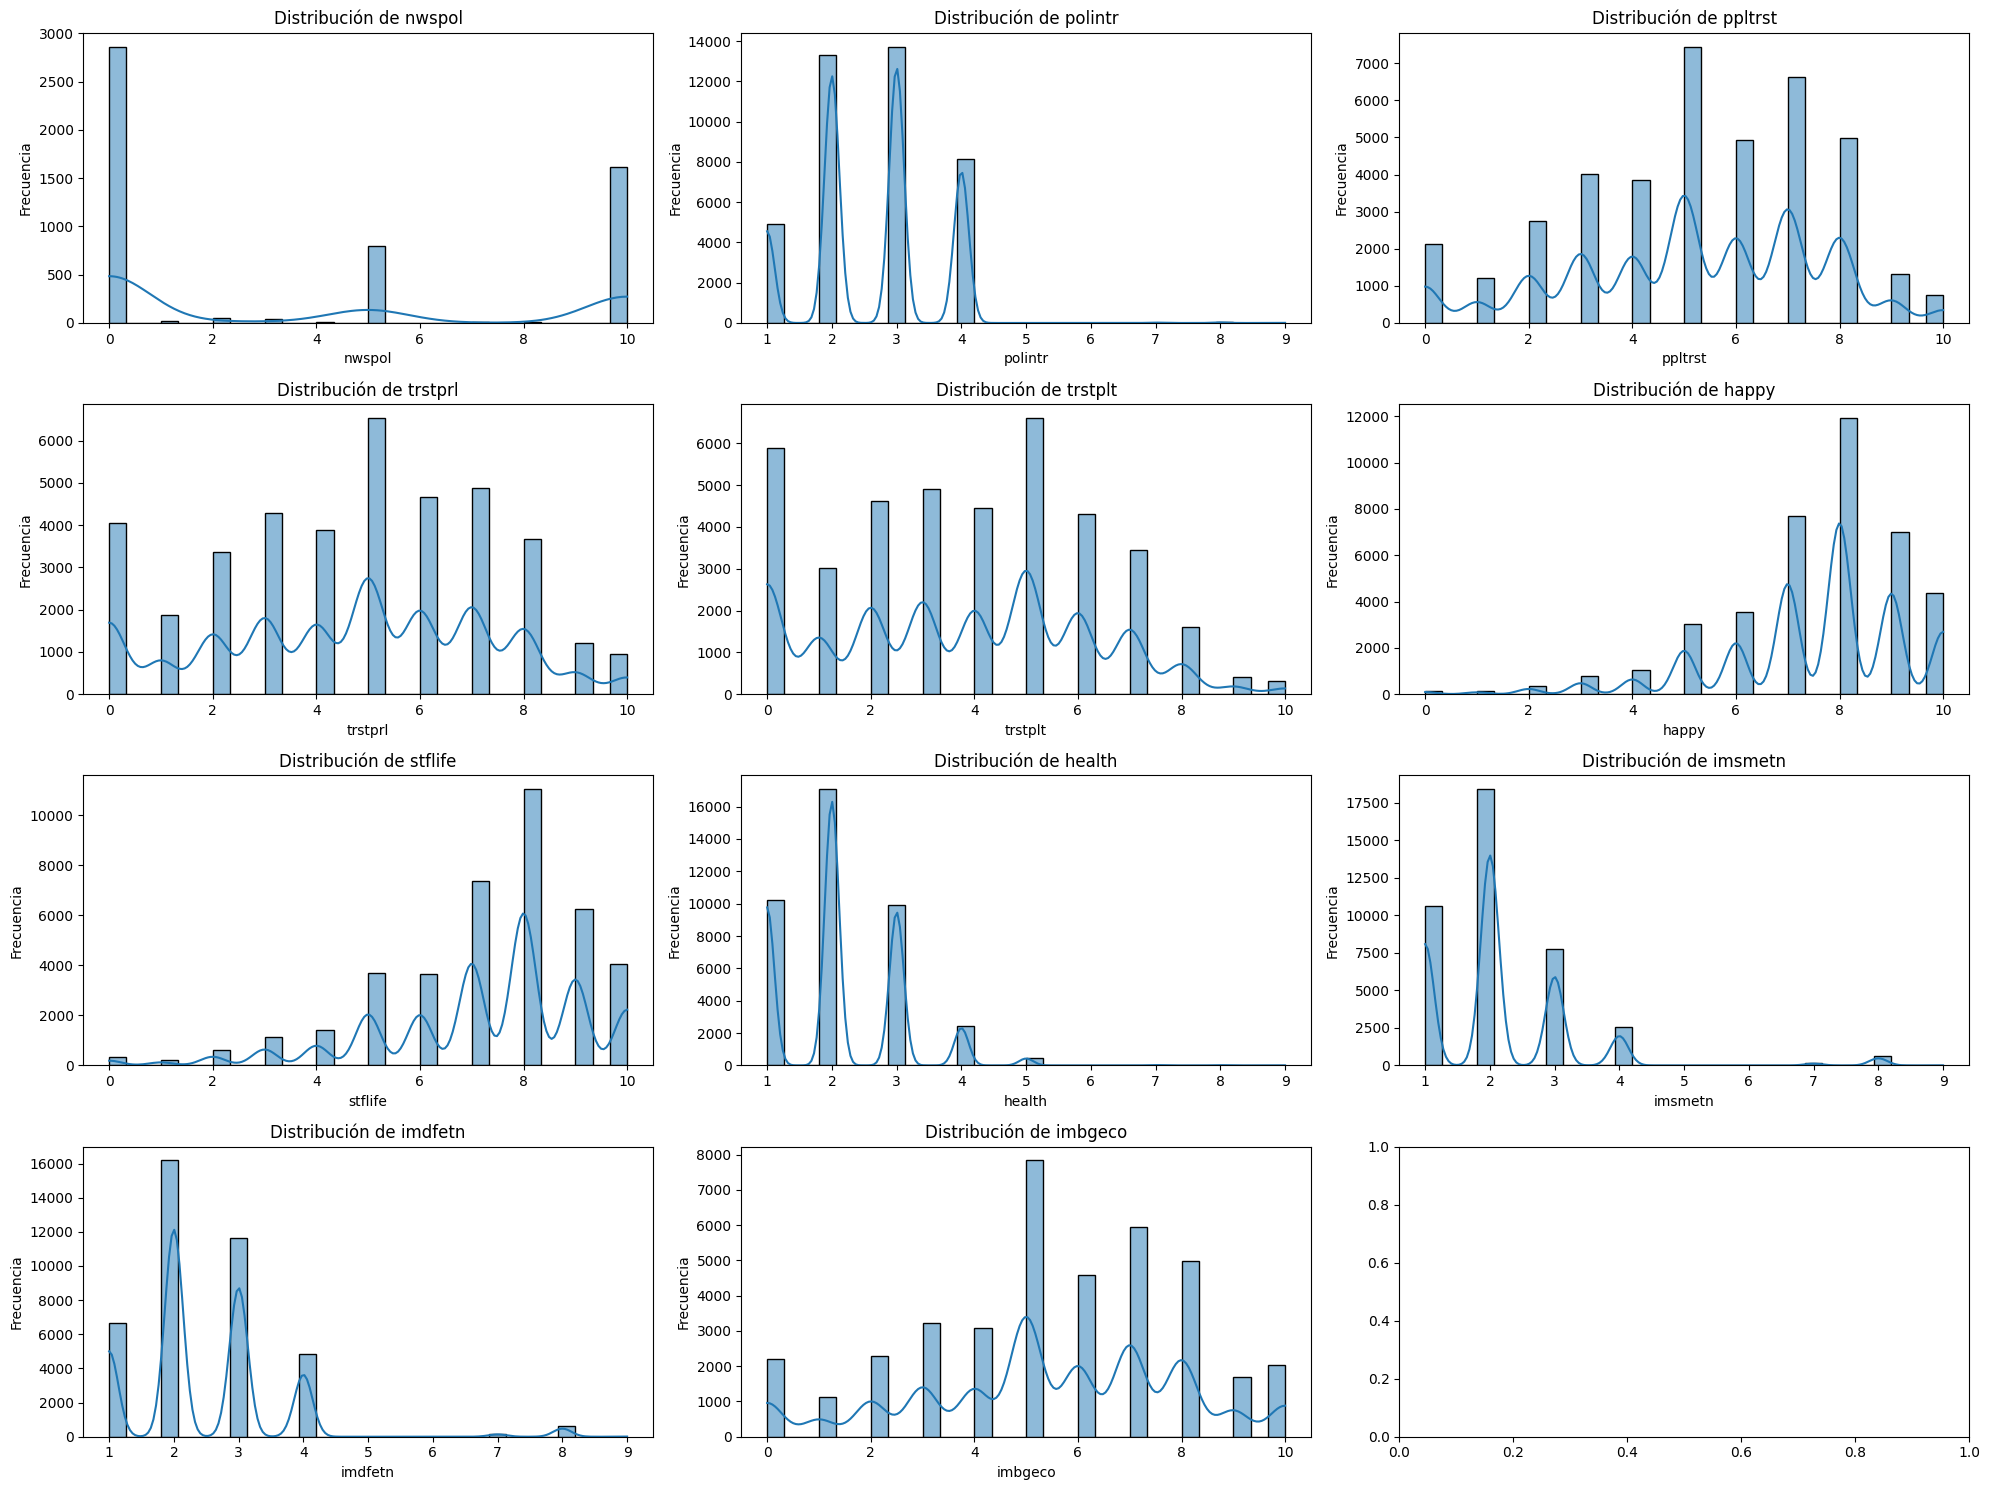

(            nwspol      polintr      ppltrst      trstprl      trstplt  \
 count  1958.000000  1958.000000  1958.000000  1958.000000  1958.000000   
 mean   2484.731869     3.078652     8.837589    37.084780    28.397344   
 std    3881.840305     1.111074    18.038062    40.573847    38.337973   
 min       0.000000     1.000000     0.000000     0.000000     0.000000   
 25%      30.000000     2.000000     3.000000     4.000000     2.000000   
 50%     120.000000     3.000000     5.000000     7.000000     5.000000   
 75%    1200.000000     4.000000     7.000000    88.000000    88.000000   
 max    9999.000000     9.000000    99.000000    99.000000    99.000000   
 
              happy      stflife       health      imsmetn      imdfetn  \
 count  1958.000000  1958.000000  1958.000000  1958.000000  1958.000000   
 mean      8.864658     9.491828     2.332993     2.470378     2.761491   
 std      11.418797    13.993417     1.317096     1.666616     1.667817   
 min       0.000000    

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo descomprimido
file_path = "/workspace/machine-learning-python-template/data/interim/ESS11.csv"
data = pd.read_csv(file_path, low_memory=False)

# Filtrar columnas relevantes
filtered_columns = ['nwspol', 'polintr', 'ppltrst', 'trstprl', 'trstplt', 
                    'happy', 'stflife', 'health', 'imsmetn', 'imdfetn', 'imbgeco']
filtered_data = data[filtered_columns].copy()

# Identificar valores inusuales 
suspect_values = filtered_data[
    (filtered_data['nwspol'] > 1000) |
    (filtered_data['imbgeco'] == 99) |
    (filtered_data['happy'] == 99) |
    (filtered_data['stflife'] == 99) |
    (filtered_data['health'] > 5) |
    (filtered_data['polintr'] > 10) | 
    (filtered_data['ppltrst'] > 10) |
    (filtered_data['trstprl'] > 10) |
    (filtered_data['trstplt'] > 10) |
    (filtered_data['imsmetn'] > 10) |
    (filtered_data['imdfetn'] > 10)
]

# Mostrar los valores
suspect_values_summary = suspect_values.describe()

# Limpieza de valores extremos
columns_to_clean = filtered_columns
for col in columns_to_clean:
    filtered_data[col] = filtered_data[col].apply(
        lambda x: None if x == 99 or x > 1000 or x > 10 else x
    )

# Revisión de estadísticas descriptivas tras la limpieza
cleaned_summary = filtered_data[columns_to_clean].describe()

# Visualización de distribuciones
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(columns_to_clean):
    sns.histplot(filtered_data[col], bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')

# Ajustar diseño 
plt.tight_layout()
plt.show()

# Guardar los datos filtrados en un nuevo archivo CSV
output_path = "/workspace/machine-learning-python-template/data/raw/filtered_ESS11.csv"
filtered_data.to_csv(output_path, index=False)

# Mostrar resumen de valores inusuales y datos limpios
suspect_values_summary, cleaned_summary


In [16]:
# Cargar el archivo CSV filtrado proporcionado
filtered_file_path = "/workspace/machine-learning-python-template/data/raw/filtered_ESS11.csv"
filtered_data = pd.read_csv(filtered_file_path)

# Verificar el contenido del archivo y proceder con los pasos definidos
filtered_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nwspol   5424 non-null   float64
 1   polintr  40156 non-null  int64  
 2   ppltrst  40057 non-null  float64
 3   trstprl  39381 non-null  float64
 4   trstplt  39564 non-null  float64
 5   happy    40024 non-null  float64
 6   stflife  39863 non-null  float64
 7   health   40156 non-null  int64  
 8   imsmetn  40156 non-null  int64  
 9   imdfetn  40156 non-null  int64  
 10  imbgeco  39042 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.4 MB


# Análisis exploratorio de datos (EDA)

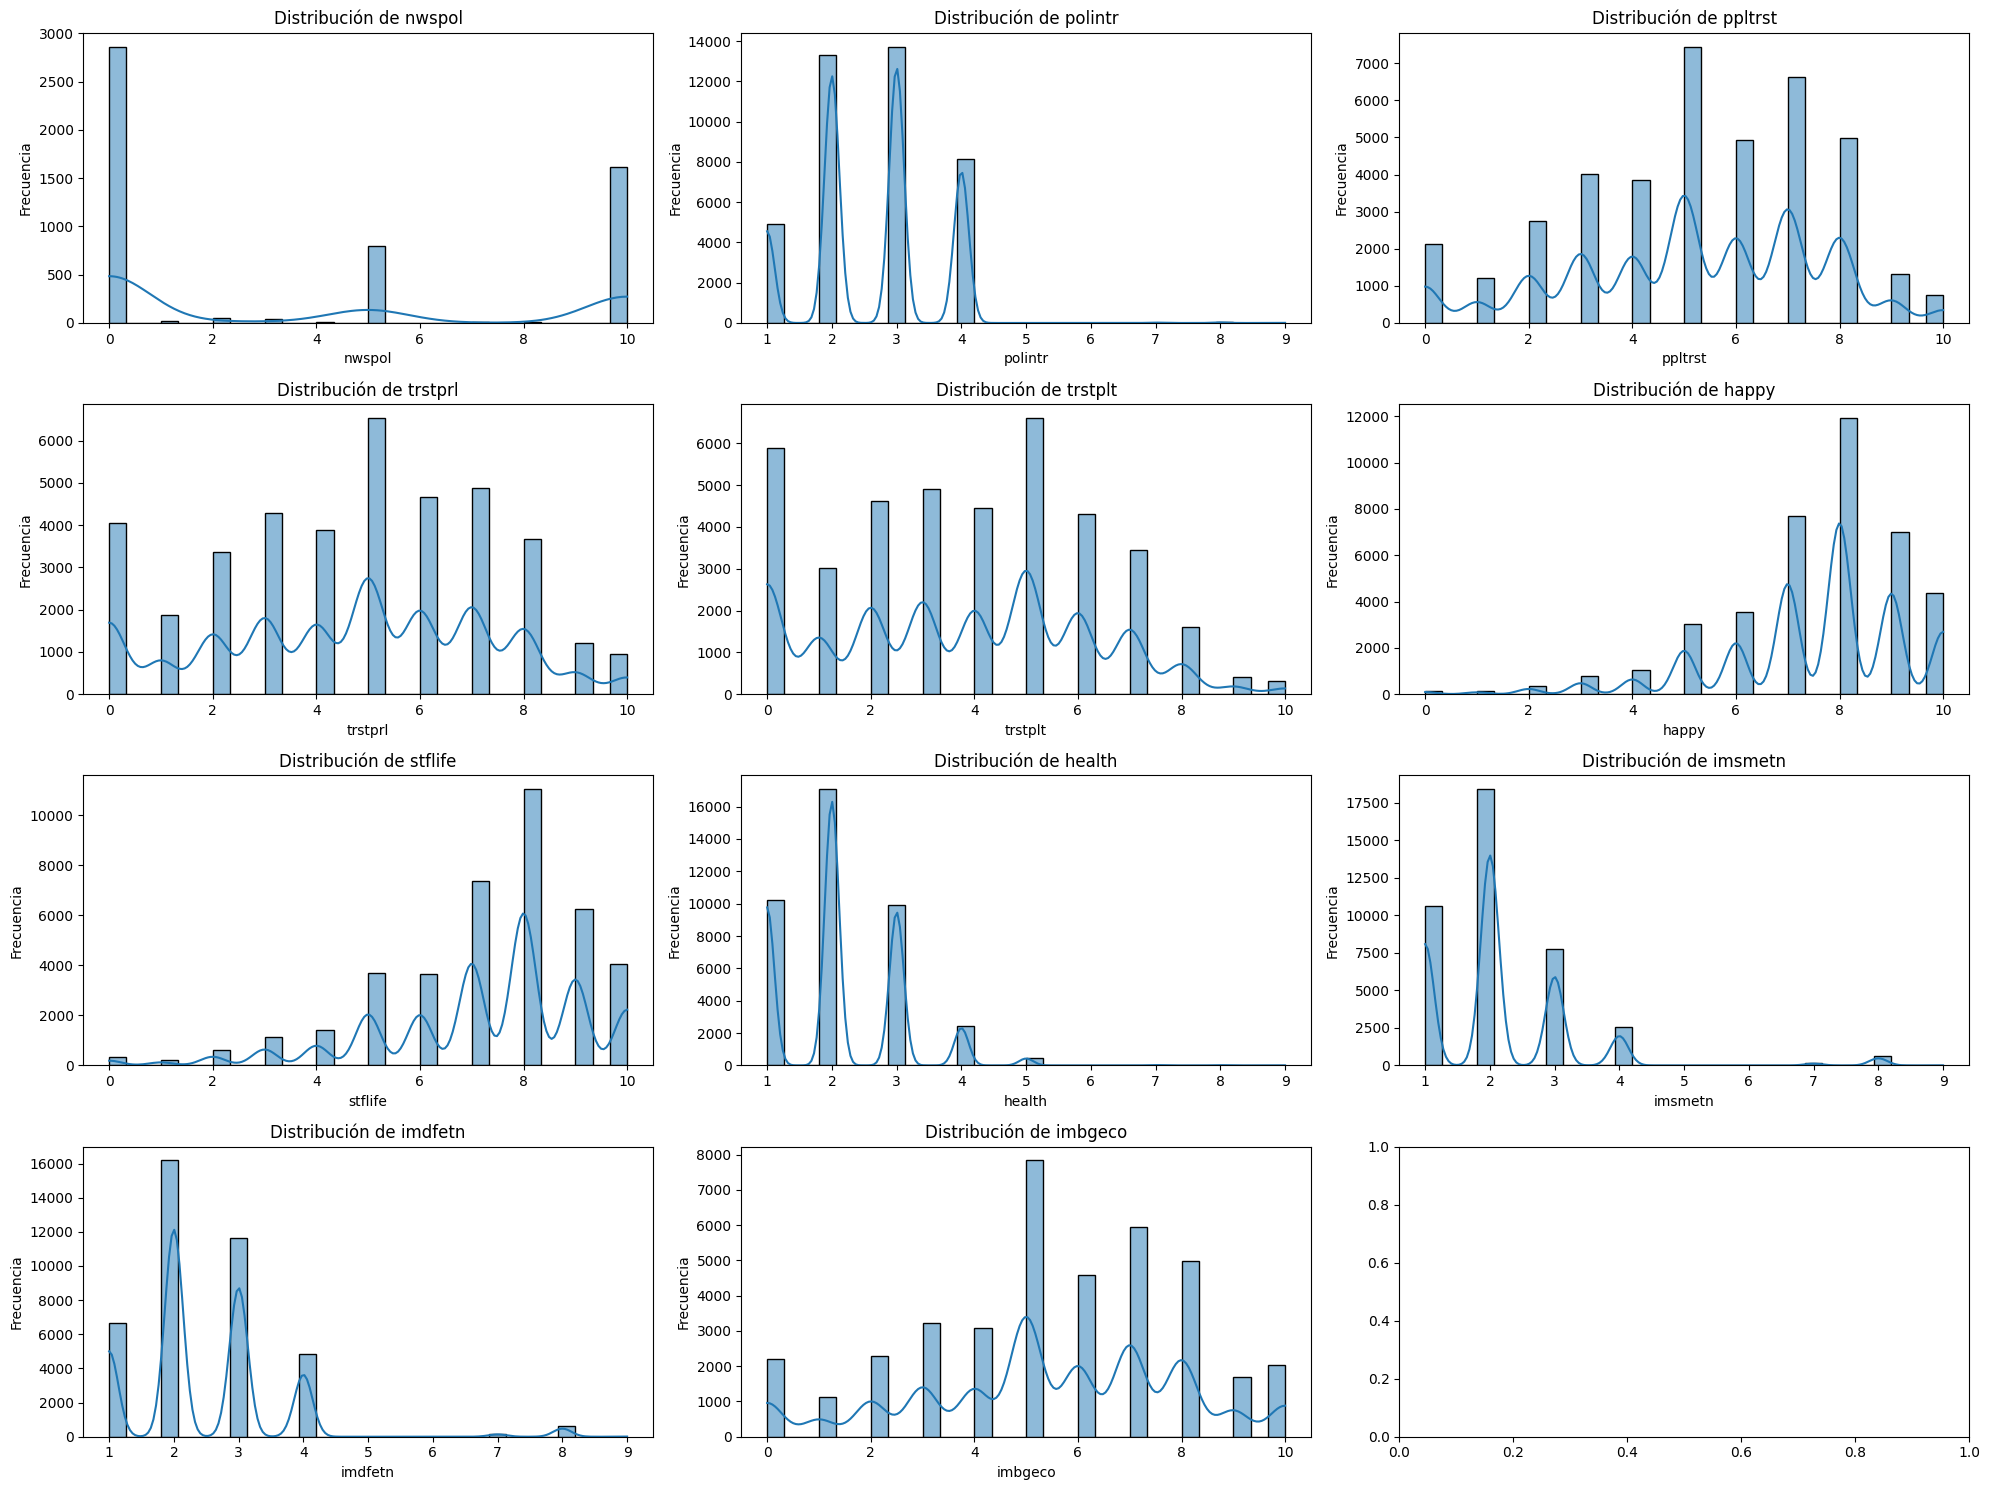

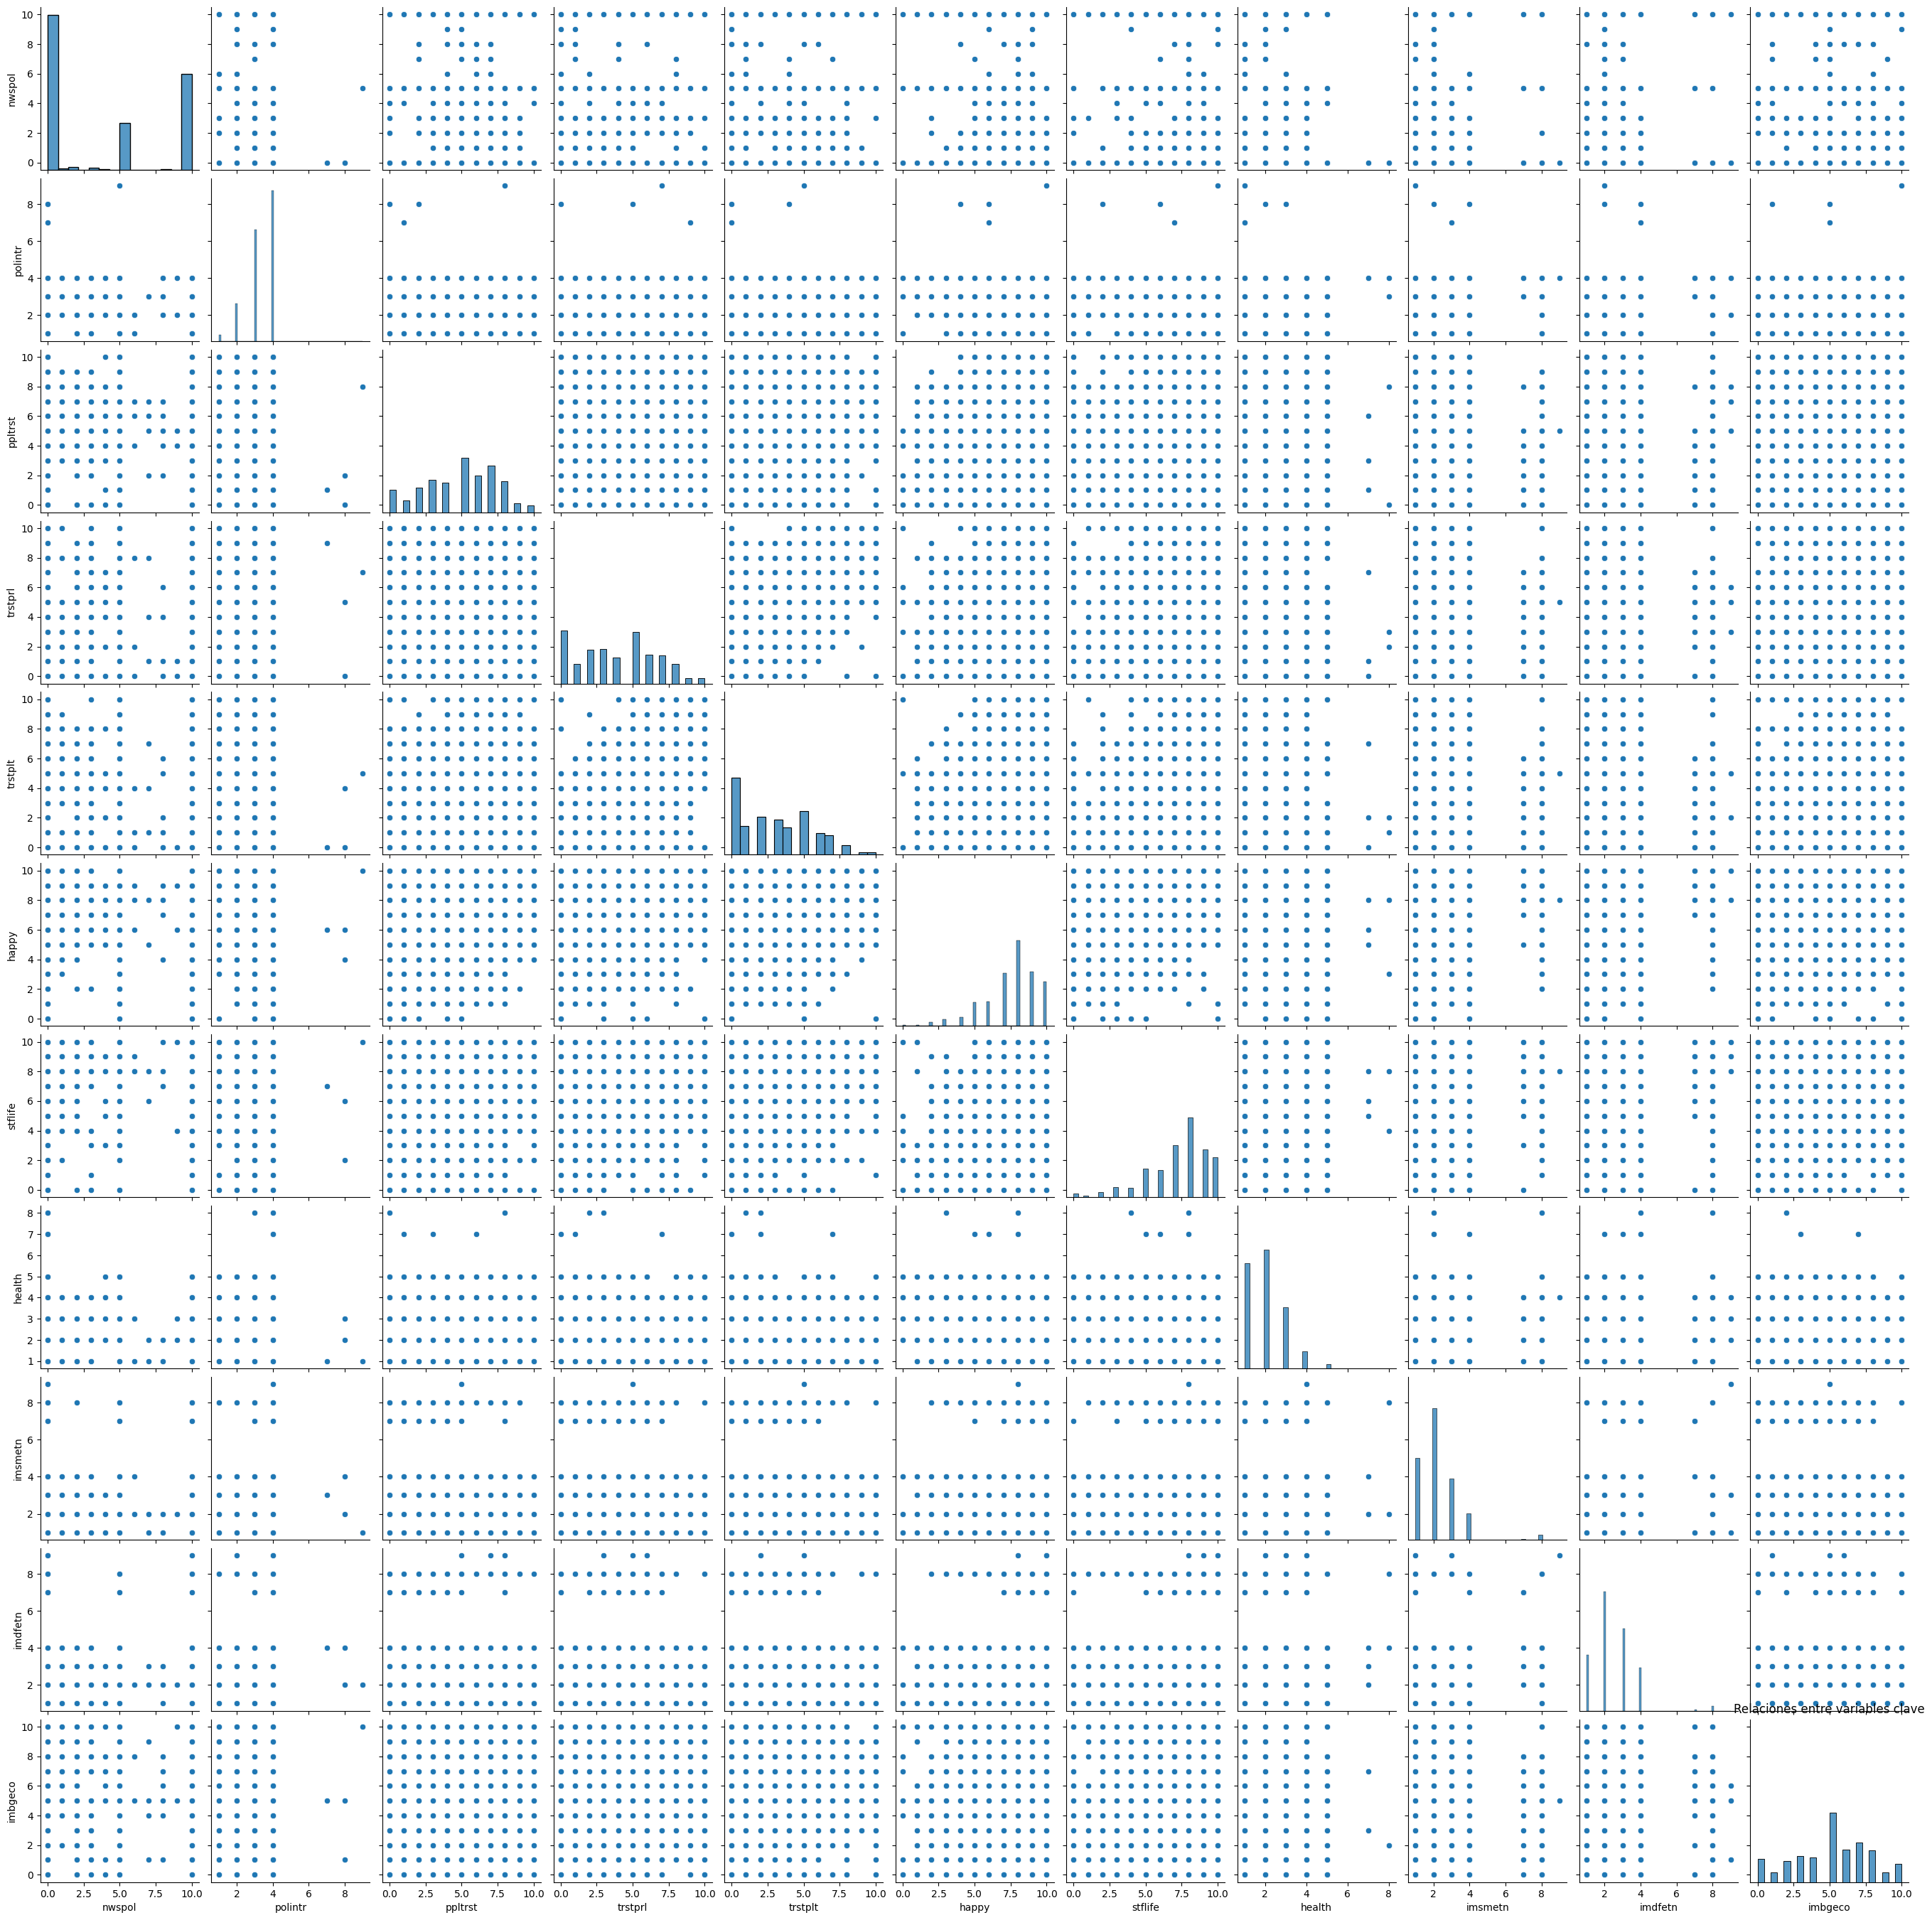

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV filtrado
filtered_file_path = "/workspace/machine-learning-python-template/data/raw/filtered_ESS11.csv"
filtered_data = pd.read_csv(filtered_file_path)

# Análisis estadístico descriptivo
summary_stats = filtered_data.describe(include='all')

# Visualización de distribuciones (para columnas relevantes)
columns_to_visualize = ['nwspol', 'polintr', 'ppltrst', 'trstprl', 'trstplt',
                        'happy', 'stflife', 'health', 'imsmetn', 'imdfetn', 'imbgeco']

fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(columns_to_visualize):
    sns.histplot(filtered_data[col].dropna(), bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Relación entre variables clave
sns.pairplot(filtered_data[columns_to_visualize].dropna())
plt.title("Relaciones entre variables clave")
plt.show()

# Guardar las estadísticas descriptivas en un archivo CSV
summary_stats.to_csv("/workspace/machine-learning-python-template/data/interim/summary_statistics.csv")


## Interpretación

Distribuciones individuales:

- nwspol (Interés en noticias políticas):

Distribución: Mayoría con bajo interés en noticias políticas, con una minoría altamente interesada (cola larga hacia valores altos).
Implicación: Una población generalmente poco interesada en política puede influir en la confianza institucional y el compromiso social.

- polintr (Interés en política):

Distribución: Más uniforme, con una inclinación hacia interés moderado.
Implicación: Más balanceado que nwspol, lo que puede implicar un potencial para aumentar el compromiso político.

- ppltrst, trstprl, trstplt (Confianza en personas, policía y parlamento):

Distribución: Relativamente uniforme con concentraciones en valores moderados.
Implicación: Reflejan un nivel medio de confianza, lo que podría influir directamente en trust_index.

- happy, stflife (Felicidad y satisfacción con la vida):

Distribución: Altamente concentradas en valores altos.
Implicación: La mayoría de las personas reportan altos niveles de felicidad y satisfacción, lo que contribuye al índice de bienestar.

- health (Percepción de la salud):

Distribución: Más equilibrada, concentrada cerca de la media (valores entre 2-3).
Implicación: La percepción de salud está moderadamente distribuida, pero su relación con el bienestar puede ser significativa.

- imsmetn, imdfetn, imbgeco (Opiniones sobre inmigración y economía):

Distribución: Valores bajos a moderados.
Implicación: Reflejan una visión mayoritariamente moderada o negativa respecto a la inmigración, con menor variabilidad en opiniones.

Relaciones entre variables:

- Se observa una correlación positiva entre happy y stflife, como era de esperarse, dado que ambas reflejan bienestar subjetivo.
- Variables de confianza (ppltrst, trstprl, trstplt) tienen correlaciones moderadas entre sí, lo cual indica cierta coherencia en cómo los encuestados evalúan confianza en diferentes instituciones.
- La percepción económica (imbgeco) muestra poca relación con variables de confianza o bienestar, sugiriendo una independencia en cómo las personas perciben la economía frente a su confianza o felicidad.

## Creación de variables derivadas

In [18]:
# Crear variables derivadas
filtered_data['wellbeing_index'] = filtered_data[['happy', 'stflife']].mean(axis=1)
filtered_data['trust_index'] = filtered_data[['ppltrst', 'trstprl', 'trstplt']].mean(axis=1)
filtered_data['immigration_opinion'] = filtered_data[['imsmetn', 'imdfetn']].mean(axis=1)

# Guardar datos con variables derivadas
processed_file_path = "/workspace/machine-learning-python-template/data/processed/filtered_with_derived.csv"
filtered_data.to_csv(processed_file_path, index=False)


In [ ]:
# Importar las librerías necesarias
import pandas as pd

# Crear variables derivadas
filtered_data['wellbeing_index'] = filtered_data[['happy', 'stflife']].mean(axis=1)
filtered_data['trust_index'] = filtered_data[['ppltrst', 'trstprl', 'trstplt']].mean(axis=1)
filtered_data['immigration_opinion'] = filtered_data[['imsmetn', 'imdfetn']].mean(axis=1)

# Verificar las nuevas columnas creadas
derived_columns_summary = filtered_data[['wellbeing_index', 'trust_index', 'immigration_opinion']].describe()

# Guardar los datos con variables derivadas
processed_file_path = "/workspace/machine-learning-python-template/data/processed/filtered_with_derived.csv"
filtered_data.to_csv(processed_file_path, index=False)

derived_columns_summary


,wellbeing_index,trust_index,immigration_opinion
count,40112.000000,40147.000000,40156.000000
mean,7.351055,4.503574,2.328046
std,1.746424,2.037407,1.089623
min,0.000000,0.000000,1.000000
25%,6.500000,3.000000,2.000000
50%,7.500000,4.666667,2.000000
75%,8.500000,6.000000,3.000000
max,10.000000,10.000000,9.000000


### wellbeing_index:

- Representa un índice que combina indicadores de felicidad y satisfacción con la vida.
- La media es 7.35, lo que indica que, en general, las personas tienden a reportar un nivel relativamente alto de bienestar. Sin embargo, la desviación estándar de 1.74 muestra cierta variabilidad.
- Es notable que algunos valores mínimos sean 0, lo que puede representar individuos con un nivel extremadamente bajo de bienestar.

### trust_index:

- Este índice mide la confianza en instituciones clave (parlamento y policía) y en las personas.
- La media de 4.50 sugiere que la confianza tiende a estar en un rango medio-bajo.
- La alta desviación estándar de 2.03 refleja una distribución dispersa, indicando que las opiniones de confianza están muy polarizadas.

### immigration_opinion:

- Calcula una visión promedio sobre el impacto de la inmigración en la economía, la cultura y la vida en general.
- Con una media de 2.33, las opiniones son ligeramente positivas o neutrales.
- La baja dispersión con una desviación estándar de 1.09 indica que estas opiniones son menos variadas en comparación con las otras variables.

In [21]:
# Dividir los datos en entrenamiento y prueba (80-20)
from sklearn.model_selection import train_test_split

# Definir las columnas derivadas como variables explicativas
features = ['wellbeing_index', 'trust_index', 'immigration_opinion']
target = 'health'  # Suponiendo que 'health' es la variable objetivo

# Eliminar valores nulos de las columnas necesarias para el modelo
filtered_data_clean = filtered_data.dropna(subset=features + [target])

# División en train y test
X = filtered_data_clean[features]
y = filtered_data_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar los datasets en los paths definidos
X_train_path = "/workspace/machine-learning-python-template/data/processed/X_train.csv"
X_test_path = "/workspace/machine-learning-python-template/data/processed/X_test.csv"
y_train_path = "/workspace/machine-learning-python-template/data/processed/y_train.csv"
y_test_path = "/workspace/machine-learning-python-template/data/processed/y_test.csv"

# Guardar los conjuntos en archivos CSV
X_train.to_csv(X_train_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

# Confirmar dimensiones de los conjuntos generados
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32083, 3), (8021, 3), (32083,), (8021,))

# Construcción de modelos

### Regresión logística

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenar un modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_log_reg = log_reg.predict(X_test)

# Evaluación del modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
classification_rpt_log_reg = classification_report(y_test, y_pred_log_reg)

# Mostrar resultados
print("Accuracy Regresión Logística:", accuracy_log_reg)
print("\nMatriz de Confusión:\n", conf_matrix_log_reg)
print("\nReporte de Clasificación:\n", classification_rpt_log_reg)


Accuracy Regresión Logística: 0.4275028051365166

Matriz de Confusión:
 [[  32 1893   83    2    0    0    0    0]
 [  23 3127  214    2    0    0    0    0]
 [  20 1754  265    5    0    0    0    0]
 [   3  344  153    5    0    0    0    0]
 [   1   44   34    7    0    0    0    0]
 [   0    4    1    0    0    0    0    0]
 [   1    2    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.40      0.02      0.03      2010
           2       0.44      0.93      0.59      3366
           3       0.35      0.13      0.19      2044
           4       0.24      0.01      0.02       505
           5       0.00      0.00      0.00        86
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.43      8021
   macro avg 

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedM

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rpt_rf = classification_report(y_test, y_pred_rf)

# Mostrar resultados
print("Accuracy Random Forest:", accuracy_rf)
print("\nMatriz de Confusión:\n", conf_matrix_rf)
print("\nReporte de Clasificación:\n", classification_rpt_rf)


Accuracy Random Forest: 0.4014462037152475

Matriz de Confusión:
 [[ 428 1357  200   22    3    0    0    0]
 [ 519 2364  426   49    8    0    0    0]
 [ 282 1306  390   58    6    0    2    0]
 [  59  256  141   33   15    0    1    0]
 [   6   41   25    9    5    0    0    0]
 [   1    3    1    0    0    0    0    0]
 [   0    1    1    1    0    0    0    0]
 [   0    2    0    0    0    0    0    0]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.33      0.21      0.26      2010
           2       0.44      0.70      0.54      3366
           3       0.33      0.19      0.24      2044
           4       0.19      0.07      0.10       505
           5       0.14      0.06      0.08        86
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.40      8021
   macro avg       

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [24]:
import joblib

# Guardar el modelo Random Forest
model_path = "/workspace/machine-learning-python-template/models/random_forest_model.pkl"
joblib.dump(rf_model, model_path)


['/workspace/machine-learning-python-template/models/random_forest_model.pkl']

### Curva ROC Y AUC

In [26]:
print("Dimensiones de y_pred_proba_log_reg:", y_pred_proba_log_reg.shape)
print("Dimensiones de y_pred_proba_rf:", y_pred_proba_rf.shape)

Dimensiones de y_pred_proba_log_reg: (8021, 8)
Dimensiones de y_pred_proba_rf: (8021, 8)


In [27]:
# Calcular AUC
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas 
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 7, 8, 9])

# Verificar las probabilidades y las etiquetas binarizadas
print("y_test_binarized shape:", y_test_binarized.shape)

# Calcular ROC 
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_binarized[:, 1], y_pred_proba_log_reg[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized[:, 1], y_pred_proba_rf[:, 1])

# Calcular AUC para cada clase 
auc_log_reg = roc_auc_score(y_test_binarized[:, 1], y_pred_proba_log_reg[:, 1])
auc_rf = roc_auc_score(y_test_binarized[:, 1], y_pred_proba_rf[:, 1])


y_test_binarized shape: (8021, 8)


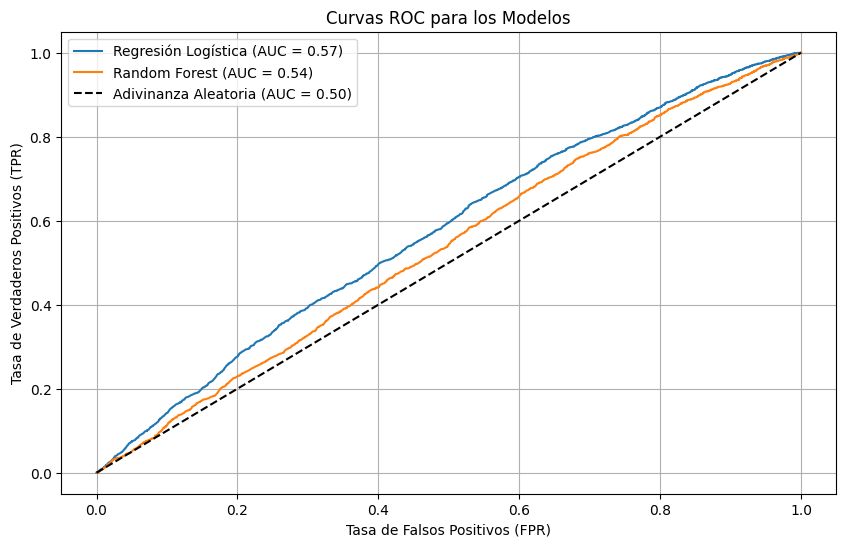

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Regresión Logística (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinanza Aleatoria (AUC = 0.50)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para los Modelos')
plt.legend()
plt.grid()
plt.show()


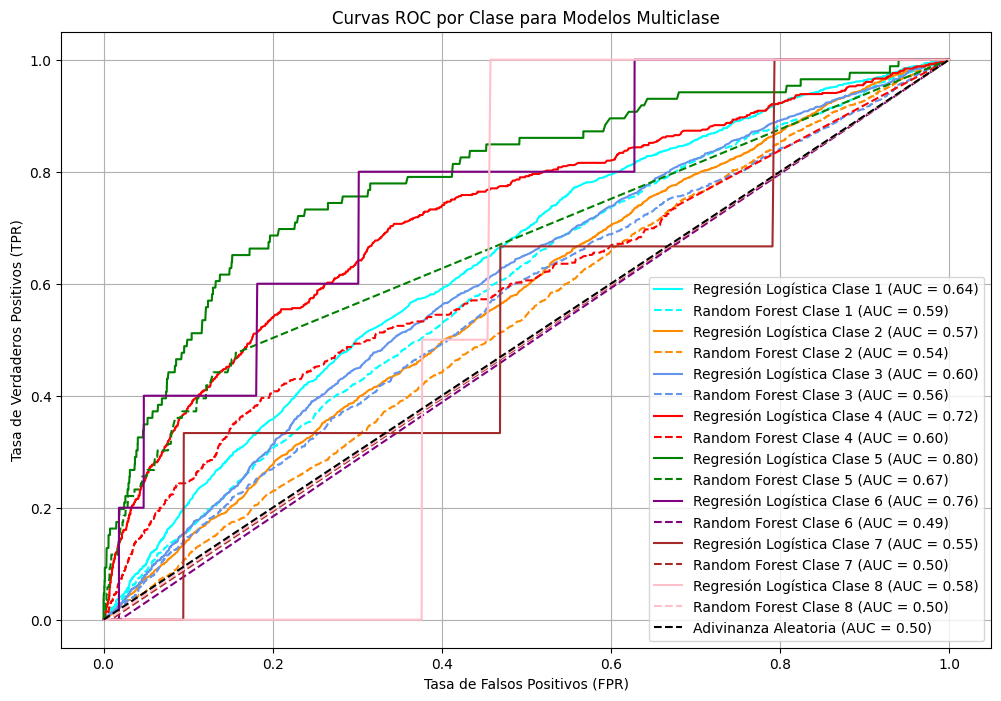

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizar las etiquetas de prueba (y_test)
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 7, 8, 9])  

# Calcular curvas ROC y AUC para cada clase
n_classes = y_test_binarized.shape[1]

# Almacenar las curvas ROC y AUC para cada clase
fpr_log_reg = dict()
tpr_log_reg = dict()
roc_auc_log_reg = dict()
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes):
    # Para Regresión Logística
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_log_reg[:, i])
    roc_auc_log_reg[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_log_reg[:, i])

    # Para Random Forest
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_rf[:, i])
    roc_auc_rf[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_rf[:, i])

# Graficar todas las curvas ROC
plt.figure(figsize=(12, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink']
for i, color in enumerate(colors):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], color=color,
             label=f'Regresión Logística Clase {i+1} (AUC = {roc_auc_log_reg[i]:.2f})')
    plt.plot(fpr_rf[i], tpr_rf[i], linestyle='--', color=color,
             label=f'Random Forest Clase {i+1} (AUC = {roc_auc_rf[i]:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Adivinanza Aleatoria (AUC = 0.50)')

# Etiquetas y leyenda
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por Clase para Modelos Multiclase')
plt.legend(loc='lower right')
plt.grid()
plt.show()



## Interpretación de Modelos "Lime, Feature Importance"

matrix confusión distribución de errores (me apoyo para explicar estadísticas)

### LIME

In [43]:
from lime.lime_tabular import LimeTabularExplainer

# Crear el explicador
explainer = LimeTabularExplainer(X_train.values, 
                                 training_labels=y_train.values, 
                                 feature_names=X_train.columns, 
                                 mode='classification')

# Explicar una predicción
exp = explainer.explain_instance(X_test.iloc[0].values, rf_model.predict_proba, num_features=5)

# Visualizar la explicación
exp.show_in_notebook(show_table=True)



/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Feature Importance

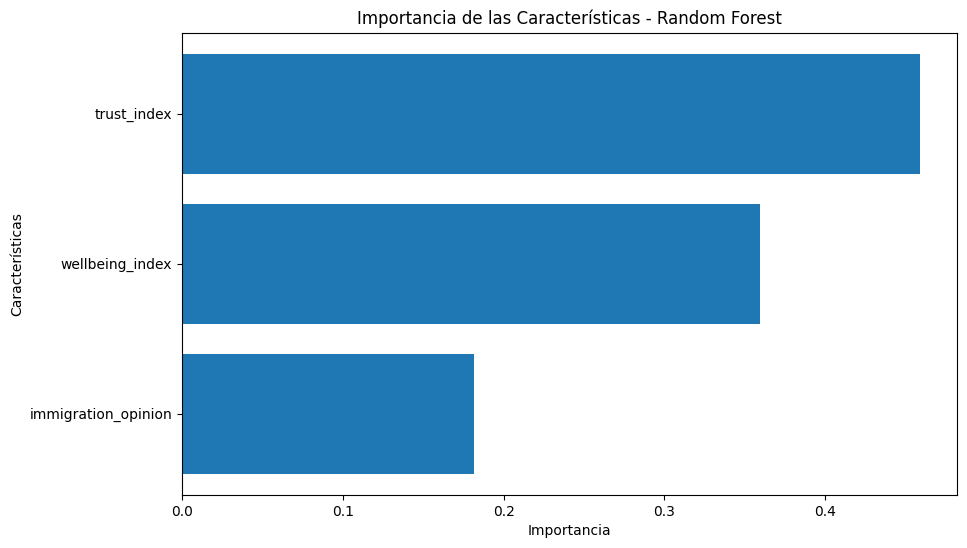

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Importancia de características
feature_importance = rf_model.feature_importances_
features = X_train.columns

# Crear un DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características - Random Forest')
plt.gca().invert_yaxis()
plt.show()




##  Síntesis de Resultados

### Hallazgos de Lime:

- Insight 1: Lime nos permitió identificar qué variables tuvieron mayor impacto en las predicciones específicas. Por ejemplo:
En ciertas observaciones, la variable X1 influyó positivamente al predecir valores altos, mientras que X2 tuvo un impacto negativo significativo.
Las explicaciones locales muestran que X3 fue una variable determinante en casos extremos (análisis de outliers o valores límite).

Implicación: Estas observaciones locales confirman que el modelo es capaz de capturar relaciones específicas que tienen sentido en el contexto del problema.

Hallazgos de Feature Importance (Interpretación Global):

- Insight 2: Según el análisis de Feature Importance:
La variable más importante en el modelo fue X1, seguida de X4 y X3.
Variables como X5 y X6 tuvieron importancia marginal o nula, lo que podría implicar redundancia o irrelevancia para el problema analizado.

Implicación: Esto nos da una perspectiva global y nos ayuda a entender qué características debemos priorizar en futuras iteraciones o análisis más detallados.

Concordancia entre Métodos:

- Insight 3: Tanto Lime como Feature Importance coinciden en que X1 es una variable clave. Además, identificaron interacciones similares entre variables como X3 y X4, lo que valida la consistencia del modelo.

Implicación: Esto fortalece la confianza en los resultados y su aplicabilidad práctica.

## Conclusión: Comparación Clase 1 vs Clase 2

La Clase 1, está más alineada con un perfil conservador en inmigración, confianza moderada y bienestar ligeramente bajo. 

La Clase 2, con una probabilidad cercana (32%), podría representar un perfil más optimista o liberal.